In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload

# K-means
### Load data and initialize cluster centers

In [2]:
from helper import load_data, normalize_data

data = load_data()

In [3]:
print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(272, 2)


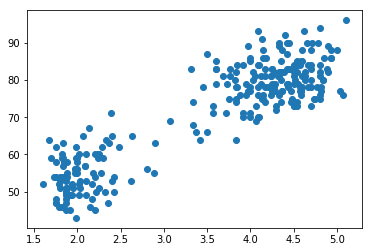

In [4]:
fig = plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.show()

In [5]:
def initialize_clusters(data, k):
    """initialize the K cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the K-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    
    return data[np.random.choice(np.shape(data)[0],k)]

### Update K-means parameters

In [6]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    num_clusters = np.shape(mu)[0]
    num_samples = np.shape(data)[0]
    dist_matrix = []
    
    for kk in range(num_clusters):
        kthcenter_dist = np.sum(np.square(data - mu[kk,:]), axis=1) # row vector of length=num_samples
        dist_matrix.append(kthcenter_dist)
        
    return np.matrix(dist_matrix).T

In [7]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    num_clusters = np.shape(mu_old)[0]
    num_features = np.shape(data)[1]
    dist_matrix = build_distance_matrix(data, mu_old)
    
    losses = dist_matrix.min(axis=1)
    assignments = dist_matrix.argmin(axis=1)
    
    mu = np.empty((num_clusters, num_features))
    for kk in range(num_clusters):
        nn = np.where(assignments == kk)[0]
        mu[kk,:] = np.mean(data[nn], axis=0)

    return losses, assignments, mu

The current iteration of k-means is: 0,                the average loss is 129.4337926029412.


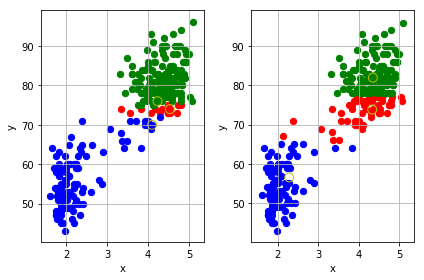

The current iteration of k-means is: 1,                the average loss is 22.78731565870998.


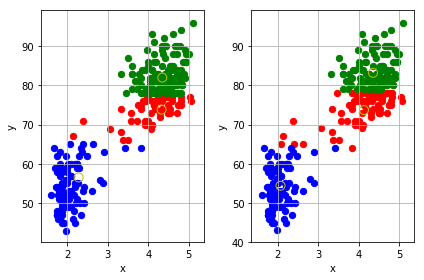

The current iteration of k-means is: 2,                the average loss is 19.65537203383356.


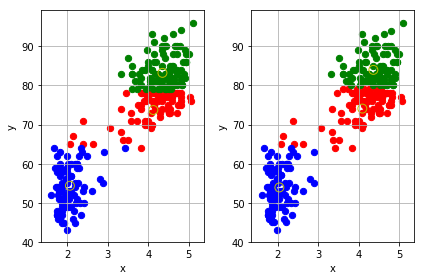

The current iteration of k-means is: 3,                the average loss is 19.314671431914004.


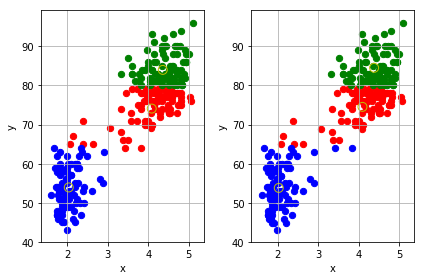

The current iteration of k-means is: 4,                the average loss is 19.111048176937995.


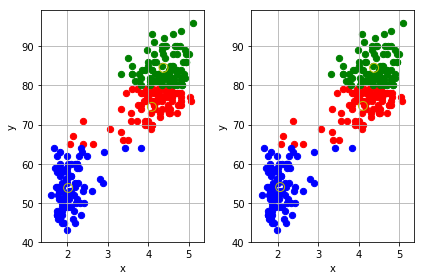

The current iteration of k-means is: 5,                the average loss is 19.075516427325798.


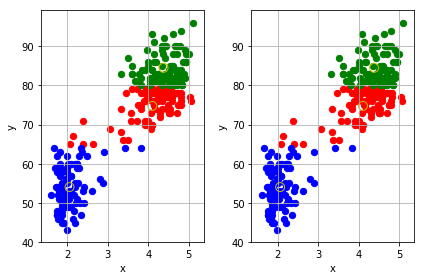

The current iteration of k-means is: 6,                the average loss is 19.075516427325798.


In [8]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 3
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

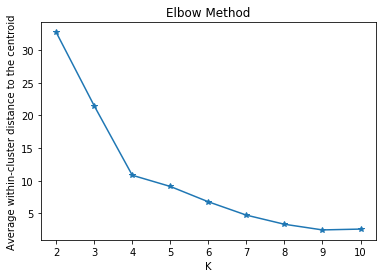

In [11]:
def Elbow_method(data, ks, max_iters, threshold):
    """Plot the percentage  of variance  explained  as  a  function  of  the  number  of  clusters"""
    dist_av = []
    
    for k_ in ks:
        mu_old = initialize_clusters(data, k_)
        loss_list = []
        
        for iter in range(max_iters):
            losses, assignments, mu = update_kmeans_parameters(data, mu_old)
            average_loss = np.mean(losses)
            loss_list.append(average_loss)
            if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
                break
            mu_old = mu
        
        dist_av.append(loss_list[-1])
        
    fig = plt.figure()
    plt.plot(ks, dist_av, '-*')
    plt.xlabel('K')
    plt.ylabel('Average within-cluster distance to the centroid')
    plt.title('Elbow Method')
    plt.show()
    
ks = range(2, 11)
max_iters = 10
threshold = 1e-5

Elbow_method(data, ks, max_iters, threshold)

## Using K-means for image compression

In [12]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


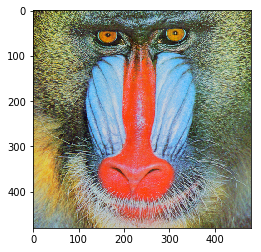

In [13]:
fig = plt.figure()
plt.imshow(original_image)
plt.show()

In [14]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = np.reshape(original_image, (np.shape(original_image)[0]*np.shape(original_image)[1], 
                                                  np.shape(original_image)[2]))
    processed_image = processed_image.astype(float)
    
    return processed_image

processed_image = preprocess_image(original_image)

In [15]:
print(np.shape(processed_image))

(230400, 3)


The current iteration of k-means is: 0,                the average loss is 894.6295529513889.
The current iteration of k-means is: 10,                the average loss is 534.3808234159146.
The current iteration of k-means is: 20,                the average loss is 516.1475371616268.
The current iteration of k-means is: 30,                the average loss is 508.65798411847715.
The current iteration of k-means is: 40,                the average loss is 506.5982998164188.
The current iteration of k-means is: 50,                the average loss is 505.0397887505678.
The current iteration of k-means is: 60,                the average loss is 503.88157582719714.
The current iteration of k-means is: 70,                the average loss is 503.24754065655605.
The current iteration of k-means is: 80,                the average loss is 502.8207988224068.
The current iteration of k-means is: 90,                the average loss is 502.0439630880612.


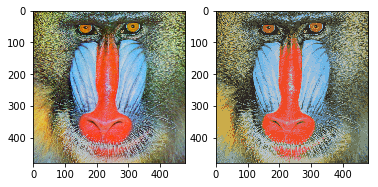

<Figure size 432x288 with 0 Axes>

In [16]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    mu_old = initialize_clusters(processed_image, k)
    loss_list = []

    for iter in range(max_iters):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        
        if iter % 10 == 0:
            print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))

        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        mu_old = mu

    # plot histgram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 20
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)

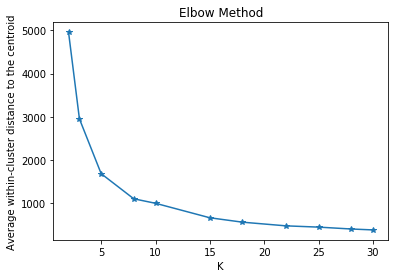

In [17]:
ks = [2, 3, 5, 8, 10, 15, 18, 22, 25, 28, 30]
max_iter = 100
threshold = 1e-6

Elbow_method(processed_image, ks, max_iters, threshold)